In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)

In [4]:
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
trocar = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [6]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

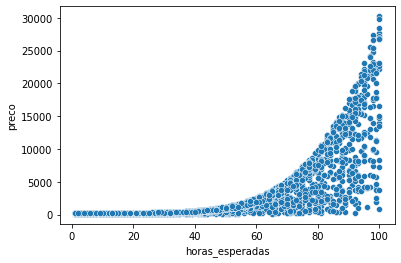

In [7]:
sns.scatterplot(x = "horas_esperadas", y = "preco", data = dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

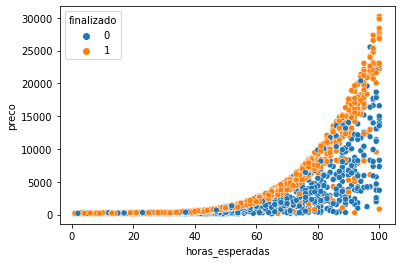

In [8]:
sns.scatterplot(x = "horas_esperadas", y = "preco",hue="finalizado", data = dados)

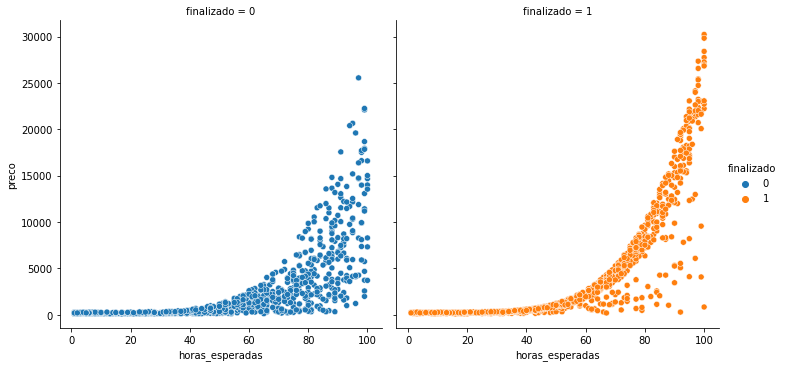

In [9]:
sns.relplot(x = "horas_esperadas", y = "preco", col="finalizado", hue="finalizado",  data = dados)

In [10]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [11]:
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y =  train_test_split(x,y, 
                                                         random_state=SEED, 
                                                         test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
modelo = OneVsRestClassifier(LinearSVC(random_state = SEED, max_iter=2000))
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)*100
print('A taxa de acerto foi de %.2f%%' % taxa_de_acerto)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A taxa de acerto foi de 65.19%


c:\robotframework_python3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
previsoes_base = np.ones(540)

In [13]:
print(treino_x)


      horas_esperadas  preco
549                16    139
1607               43    680
275                92   3772
298                60   1509
925                60   1158
...               ...    ...
844                85    498
1529               59   1738
244                34    157
577                85   5365
1755               84   9047

[1617 rows x 2 columns]


In [14]:
print(teste_y)

562     0
85      0
507     0
1624    1
822     0
       ..
102     1
1012    1
484     1
1079    1
589     0
Name: finalizado, Length: 540, dtype: int64


In [15]:
taxa_de_acerto = accuracy_score(teste_y, previsoes_base)*100
print('A taxa do algoritmo de baseline foi de %.2f%%' % taxa_de_acerto)

A taxa do algoritmo de baseline foi de 52.59%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

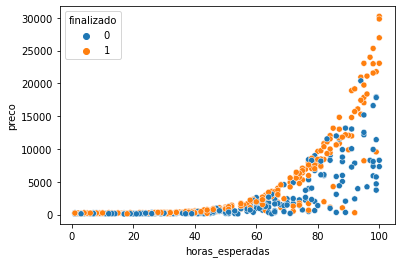

In [16]:
sns.scatterplot(x = "horas_esperadas", y = "preco", hue=teste_y, data = teste_x)

In [17]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

In [18]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [19]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

In [20]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [21]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

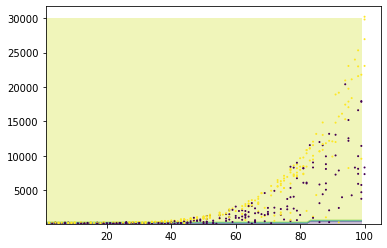

In [22]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s=1)

# DECISION BOUNDARY

In [23]:
from sklearn.svm import SVC
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y =  train_test_split(x,y, 
                                                         random_state=SEED, 
                                                         test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
modelo = OneVsRestClassifier(SVC(random_state = SEED, max_iter=2000))
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)*100
print('A taxa de acerto foi de %.2f%%' % taxa_de_acerto)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A taxa de acerto foi de 55.19%


c:\robotframework_python3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


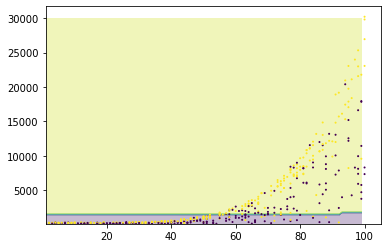

In [24]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s=1)

# DECISION BOUNDARY

In [25]:
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)

raw_treino_x, teste_x, raw_treino_y, teste_y =  train_test_split(x,y, 
                                                         random_state=SEED, 
                                                         test_size = 0.25,
                                                         stratify = y)
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(treino_x)
teste_x = scaler.transform(teste_x)


print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
modelo = OneVsRestClassifier(SVC(random_state = SEED, max_iter=2000))
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)*100
print('A taxa de acerto foi de %.2f%%' % taxa_de_acerto)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A taxa de acerto foi de 66.85%


In [26]:
type(treino_x)

numpy.ndarray

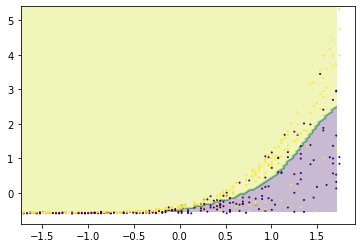

In [28]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.max()
y_max = data_y.min()
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c = teste_y, s=1)

# DECISION BOUNDARY